<a href="https://colab.research.google.com/github/HanSeoulOh/mathproblems/blob/master/privacyMath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taxonomy of Privacy Techniques

When I begun this notebook, I had only been superficially exposed to thinking about privacy. Through my journey of learning about privacy I have found two main ways to approach the problem: 

1. Statistical Privacy (SP)
2. Cryptographically Secure Privacy (CSP)

The main way that these two classes differ is that Statistical Privacy (SP) methods aim to manipulate personally identifiable information (PII), while Cryptographically Secure Privacy (CSP) methods aims to use cryptographic primitives to hide PII. Both methods aim to make the task of inference on PII difficult if not impossible.



## Statistical Privacy

Under statistical privacy, two main conceptual approaches have emerged to tackle this problem:

1. Differentially Private Mechanisms: Adding noise to a data query so that the original data is masked.
2. Group-based Anonymity: Providing a mechanism so that two rows in a dataset are indistinguishable from eachother, providing plausible deniability.





##### Helpers

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

#### Naive Dataset 1

We will generate a naive dataset that consists of rows of tuples in the following format: $(id_1, id_2, amt, des)$

Where: 
- $id_1$ is the sender
- $id_2$ is the receiver
- $amt$ is the amount transferred
- $des$ is a description

For purposes of simplicity we will start with $amt = 1$ and $des$ being a random real number from $\mathbb{R}^{[0,1]}$; $id_1, id_2 \in \mathbb{Z}$


In [0]:
class naiveDataSet:
  def __init__(self, population = 10, tx = 100):
    self.data = pd.DataFrame(data = np.array([np.random.randint(population, size=tx), np.random.randint(population, size=tx), np.ones(tx), np.random.rand(tx)]).T, columns = ['sender', 'receiver', 'amount', 'description'])

Visualizing generated dataset

In [0]:
nds = naiveDataSet()
nds.data

,sender,receiver,amount,description
0,5.0,1.0,1.0,0.736900
1,5.0,8.0,1.0,0.561088
2,3.0,6.0,1.0,0.244686
3,1.0,9.0,1.0,0.785634
4,8.0,0.0,1.0,0.150129
...,...,...,...,...
95,2.0,1.0,1.0,0.703017
96,7.0,4.0,1.0,0.524614
97,7.0,3.0,1.0,0.814274
98,5.0,0.0,1.0,0.144199


In [0]:
nds.data.groupby(['sender']).sum().mean()

receiver       48.900000
amount         10.000000
description     4.962384
dtype: float64

### Differential Privacy


The fundamental property of differentially private mechanisms is given by: $\Pr [\mathcal{K}(D) \in S] \le e^\epsilon \times \Pr [ \mathcal{K} (D') \in S]$

In plain english, a privacy mechanism is **differentially private** if it satifies the property that any row 

##### Useful References


Original Paper on DP: https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf

Original Paper on Reconstruction Attack: http://www.cse.psu.edu/~ads22/privacy598/papers/dn03.pdf

Many other privacy attacks: https://privacytools.seas.harvard.edu/files/privacytools/files/pdf_02.pdf


### Local Differential Privacy Example

Let's construct a naive POS' dataset where there are two kinds of products, one cheap, one expensive. For some reason, whatever the expensive product is being sold here, clients do not want others to know that they have a pattern in purchasing it. Perhaps the store sells normal day to day groceries, but the expensive product is an alcoholic beverage and a client would not want to be identified as being a frequent purchaser.

The rows in this dataset are represented by tuples in the form $(client, amount)$.

A statistics agency wants the data by this POS to conduct their analytics but their clients wouldn't appreciate their identities being compromised in this study.

In [0]:
df = nds.data[['sender', 'amount']]
idx = df.sample(n = int(len(df) / 5)).sort_index().index

df.loc[idx, 'amount'] = 10
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sender,amount
0,5.0,1.0
1,5.0,1.0
2,3.0,1.0
3,1.0,1.0
4,8.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f637c857e80>]],
      dtype=object)

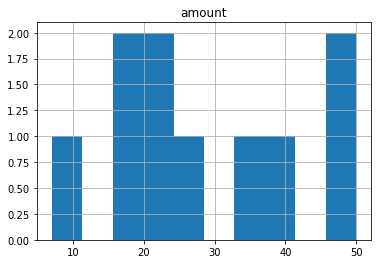

In [0]:
df.groupby('sender').sum().hist()

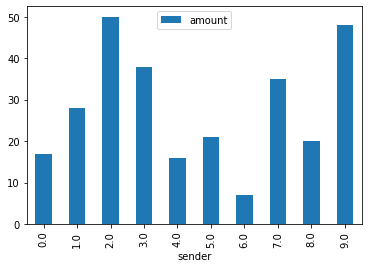

In [0]:
df.groupby('sender').sum().plot.bar()

In [0]:
df.mean()

sender    4.53
amount    2.80
dtype: float64

#### Randomized Response Mechanism



In [0]:

ndf = df.sort_index()
idx = ndf.sample(n = int(len(ndf) / 2)).sort_index().index

def randResponse(a, p):
  if np.random.rand() < p:
    if np.random.rand() < 0.5:
      return 1
    else:
      return 10
  else:
    return a

ndf.loc[idx, 'amount'] = ndf.loc[idx, 'amount'].apply(lambda x: randResponse(x, 0.1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f637c221358>]],
      dtype=object)

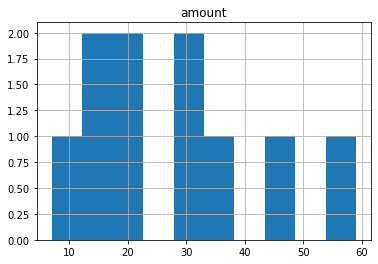

In [0]:
ndf.groupby('sender').sum().hist()

In [0]:
ndf.groupby('sender').sum()

,amount
sender,
0.0,17.0
1.0,19.0
2.0,59.0
3.0,29.0
4.0,16.0
5.0,21.0
6.0,7.0
7.0,35.0
8.0,29.0


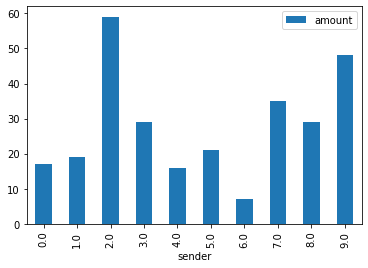

In [0]:
ndf.groupby('sender').sum().plot.bar()

In [0]:
ndf.mean()

sender    4.53
amount    2.80
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f637c0c7d68>],
      dtype=object)

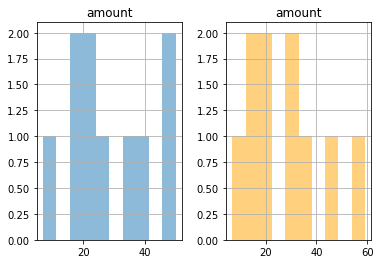

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)

df.groupby('sender').sum().hist(ax = ax1, alpha = 0.5)
ndf.groupby('sender').sum().hist(ax = ax2, color = 'orange', alpha = 0.5)

How has the data actually changed? Not by much.

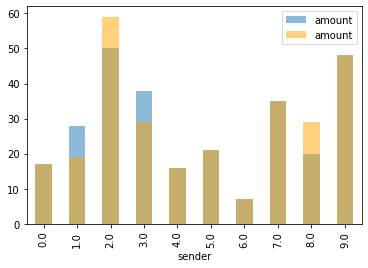

In [0]:
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(111)

df.groupby('sender').sum().plot.bar(ax = ax1, alpha = 0.5)
ndf.groupby('sender').sum().plot.bar(ax = ax1, color = 'orange', alpha = 0.5)

### k-anonymity

A column in a dataset is k-anonymous when at least k rows share the same range in place of the value.

This may be sufficient in some cases, but with sensitive data, one must always be aware that existing alternative datasets or future alternative datasets may be used to violate the anonymity of the released data.

The following is a simplified illustration of how alternative datasets can be pieced together to unveal sensitive information.

#### Homogeneity Attack

Homogeneity attacks describe the case where the sensitive column within a set of k records are identical. Even though the set has been k-anonymized, the sensitive value is trivially predicted.

Here following from a similar story in the previous attack maybe a national census reveals that there are only two Jeans with age < 20 in Canada, one of which is in ON and one of which is in QC.

In [0]:
import pandas as pd
pd.DataFrame({'name' : ['Jean', 'Jean'], 'age' : ['< 20', '< 20'], 'location': ['ON or QC', 'ON or QC'], 'diagnosis' : ['Colon Cancer or Crohns', 'Colon Cancer or Crohns']
})


,name,age,location,diagnosis
0,Jean,< 20,ON or QC,Colon Cancer or Crohns
1,Jean,< 20,ON or QC,Colon Cancer or Crohns


Similarly, another hospital specializing in crohn's and celiac disease releases their dataset under similar initiatives:

In [0]:
import pandas as pd
pd.DataFrame({'real name' : ['Jean Coutu', 'Jean Maillard'], 'age' : ['< 20', '< 20'], 'location': ['ON or QC', 'ON or QC'], 'diagnosis' : ['Colon Cancer or Crohns', 'Colon Cancer or Crohns']
})


,real name,age,location,diagnosis
0,Jean Coutu,< 20,ON or QC,Colon Cancer or Crohns
1,Jean Maillard,< 20,ON or QC,Colon Cancer or Crohns


So far so good... with just these two datasets alone, it is hard to conclude anything definitively about the patient data. However, the census bureau in Quebec decides to release a dataset with first names and age as part if a sociology study on the evolution of first names over generations.

In [0]:
pd.DataFrame({'name': ['Jean', 'Jean', 'Jean', 'Jean', 'Jean'], 'age': ['< 20', '20-55', '20-55', '20-55', '>55']})


,name,age
0,Jean,< 20
1,Jean,20-55
2,Jean,20-55
3,Jean,20-55
4,Jean,>55


Up until now Jean had plausible deniability of whether or not they had any medical condition. However with the release of the census name data, we can conclude that under 20 yo Jean from QC has Crohn's disease thus violating their privacy.

In [0]:
import pandas as pd
pd.DataFrame({'real name' : ['Jean Coutu', 'Jean Maillard'], 'age' : ['< 20', '< 20'], 'location': ['ON or QC', 'ON or QC'], 'diagnosis' : ['Gastrointestinal Disorders', 'Gastrointestinal Disorders']
})

,real name,age,location,diagnosis
0,Jean Coutu,< 20,ON or QC,Gastrointestinal Disorders
1,Jean Maillard,< 20,ON or QC,Gastrointestinal Disorders


#### Background Knowledge Attack

Imagine two hospitals with two different specializations release their patient data that is k-anonymized for the purposes of research and open data initiatives.

The first hospital specializes in colon cancer and crohn's disease and releases the following dataset:

In [0]:
pd.DataFrame({'name' : ['Jean', 'Jean'], 'age' : ['< 20', '< 20'], 'location': ['QC or AB', 'QC or AB'], 'diagnosis' : ['Crohns or Celiac', 'Crohns or Celiac']
})

,name,age,location,diagnosis
0,Jean,< 20,QC or AB,Crohns or Celiac
1,Jean,< 20,QC or AB,Crohns or Celiac


## Cryptographically Secure Privacy

In cryptographically secure privacy, the privacy mechanism is to encrypt sensitive data, the plaintext, into ciphertext so that it may not be observed by unintended evesdroppers. In general, encryption can provide secrecy of data, but secrecy alone is not always useful. Thus we will mainly explore cryptographic methods that have additional features other than pure encryption, namely:

1. Homomorphic Encryption
2. Zero Knowledge Proofs


### Homomorphic Encryption


In homomorphic encryption, operations may still be performed on the encrypted ciphertext, which can be useful for outsourcing computation.

Malleable cryptosystems are inherently not protected from CCA2 attacks.


example of simple attack...

For arbitrary m, request $c = E(pk,m)$, then peform decryption on $c*E(pk,1) $ which yields m.
http://www0.cs.ucl.ac.uk/staff/J.Groth/TCC04RRCCA.pdf

#### [Paillier Cryptosystem](https://en.wikipedia.org/wiki/Paillier_cryptosystem)

In [0]:
%%bash
git clone https://github.com/n1analytics/python-paillier

Cloning into 'python-paillier'...


In [0]:
%%bash
python python-paillier/setup.py

/usr/local/lib/python3.6/dist-packages/setuptools/dist.py:475: UserWarning: Normalizing '1.4.1-dev0' to '1.4.1.dev0'
  normalized_version,
usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: setup.py --help [cmd1 cmd2 ...]
   or: setup.py --help-commands
   or: setup.py cmd --help

error: no commands supplied
